In [31]:
import tomotopy as tp
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import numpy as np

In [3]:
mdl = tp.CTModel.load('models/wiki_math_subset-CTM-iters_-20-min_cf_-0-min_df_-5-rm_top_-15-num_topics_-25-10.bin')

In [4]:
cot_data = pd.read_csv(f'data/cot_data_50_start.csv')

try:
    word_tokenize("test")
except LookupError:
    print('downloading tokenizer...')
    nltk.download('punkt')

In [34]:
from nltk.corpus import stopwords

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
english_stops = set(stopwords.words('english'))

def tokenize(text):
    return [token for token in text.lower().split() if token.isalpha() and token not in english_stops]

In [11]:
print(top_correlations)

[0.47524595 0.47524595 0.47560126 0.47560126 0.4800775  0.4800775
 0.4801102  0.4801102  0.49619788 0.49619788]


In [18]:
cot_data['Sentences'] = cot_data['CoT Response'].apply(sent_tokenize)

In [24]:
trace_ex = cot_data['Sentences'][0]

In [28]:
topic_labels = []
for k in range(mdl.k):
    top_words = ' '.join(word for word, _ in mdl.get_topic_words(k, top_n=10))
    topic_labels.append(f"Topic #{k}: {top_words}")

In [43]:
trace_topics = []
for sentence in trace_ex:
    processed_sentence = tokenize(sentence)
    doc = mdl.make_doc(processed_sentence)
    topic_distribution = mdl.infer(doc)
    trace_topics.append(np.argmax(topic_distribution[0]))

In [44]:
trace_topics

[19, 1, 15, 3, 24, 3, 10]

KeyError: 'color'

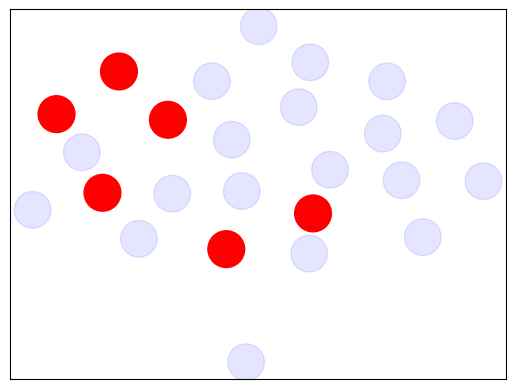

In [63]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a new graph
G = nx.Graph()

# Add nodes
# for k in range(mdl.k):
#     G.add_node(k)

# Add nodes
for k in range(mdl.k):
    G.add_node(k, color=(0, 0, 1, 0.1))  # default color (transparent blue)

# Color the nodes based on trace_topics
for topic in trace_topics:
    G.nodes[topic]['color'] = 'red'

correlations = mdl.get_correlations().reshape([-1])
correlations.sort()
correlations = correlations[:-25]
top_correlations = correlations[-50:]

# Add edges
for k in range(mdl.k):
    for l, correlation in zip(range(k - 1), mdl.get_correlations(k)):
        # if correlation not in top_correlations:
        #     continue
        G.add_edge(k, l, weight=float(correlation))

for i in range(len(trace_topics) - 1):
    if G.has_edge(trace_topics[i], trace_topics[i + 1]):
        G[trace_topics[i]][trace_topics[i + 1]]['color'] = 'red'

pos = nx.spring_layout(G)

# colors = [node[1]['color'] for node in G.nodes(data=True)]
# colors = ['red' if node in trace_topics else 'gray' for node in G.nodes()]
# nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=200)

# edge_colors = ['red' if u in trace_topics and v in trace_topics else 'gray' for u, v in G.edges() ]
# nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
# # nx.draw_networkx_edges(G, pos)


colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=700)

# edges
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')




# for (u, v, d) in G.edges(data=True):
#     nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight'])

nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')

plt.axis('off')
plt.show()

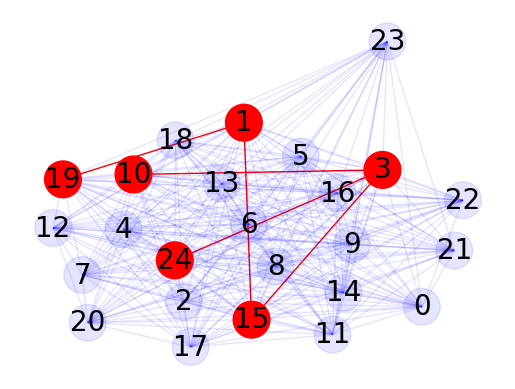

In [64]:
# Create a new graph
G = nx.Graph()

# Add nodes
for k in range(mdl.k):
    G.add_node(k, color=(0, 0, 1, 0.1))  # default color (transparent blue)

# Color the nodes based on trace_topics
for topic in trace_topics:
    G.nodes[topic]['color'] = 'red'

# Get correlations and sort them
correlations = mdl.get_correlations().reshape([-1])
correlations.sort()

# Get top 10 correlations
top_correlations = correlations[-10:]

# Add edges for top 10 correlations
for k in range(mdl.k):
    for l, correlation in zip(range(k - 1), mdl.get_correlations(k)):
        # if correlation not in top_correlations:
            # continue
        G.add_edge(k, l, weight=float(correlation), color=(0, 0, 1, 0.1))  # default color (transparent blue)

# Color the edges based on trace_topics
for i in range(len(trace_topics) - 1):
    if G.has_edge(trace_topics[i], trace_topics[i + 1]):
        G[trace_topics[i]][trace_topics[i + 1]]['color'] = 'red'

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=700)

# edges
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

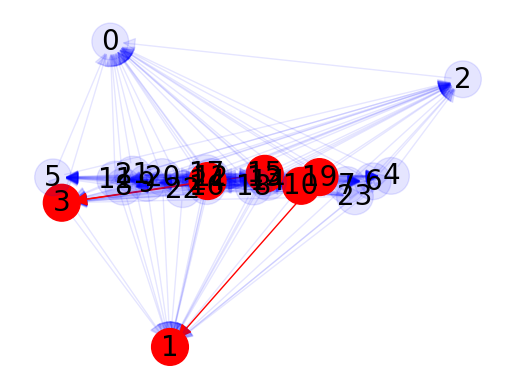

In [67]:
# Create a new directed graph
G = nx.DiGraph()

# Add nodes
for k in range(mdl.k):
    G.add_node(k, color=(0, 0, 1, 0.1))  # default color (transparent blue)

# Color the nodes based on trace_topics
for topic in trace_topics:
    G.nodes[topic]['color'] = 'red'

# Get correlations and sort them
correlations = mdl.get_correlations().reshape([-1])
correlations.sort()

# Get top 10 correlations
top_correlations = correlations[-10:]

# Add edges for top 10 correlations
for k in range(mdl.k):
    for l, correlation in zip(range(k - 1), mdl.get_correlations(k)):
        # if correlation not in top_correlations:
            # continue
        G.add_edge(k, l, weight=float(correlation), color=(0, 0, 1, 0.1))  # default color (transparent blue)

# Color the edges based on trace_topics
for i in range(len(trace_topics) - 1):
    if G.has_edge(trace_topics[i], trace_topics[i + 1]):
        G[trace_topics[i]][trace_topics[i + 1]]['color'] = 'red'

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=700)

# edges
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrowstyle='-|>', arrowsize=20)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()